In [1]:
import os
# Change the terminal placement to the folder where the py files  are located  
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code') 
# We position ourselves in the directory where the main classes are located.
print(f" You are currently in the directory: {os.getcwd()}")

 You are currently in the directory: /Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code


In [2]:
from Zoro import *
from functions import *
from Zoro_MD import * 
from help_function import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [3]:
mpl.style.use('seaborn')

In [4]:
# problem set up
n = 2000
s = int(0.1*n)
# noise amplitude
noiseamp = 0.001
#noiseamp = 0 
decay_factor=0.5
x_star=tools.sparse_vector(n=n,s=s)
#obj_func = SparseQuadric(n, s, noiseamp)
#obj_func=CompressibleQuadric(n=n, decay_factor=decay_factor, noiseamp=noiseamp)
#obj_func=SparseQuadric(n, s, noiseamp)
obj_func=weakly_sparse(n,x_star, noiseamp)
# Choose initialization
x0    = np.random.randn(n)
x0    = 100*x0/np.linalg.norm(x0)
xx0   = copy.deepcopy(x0)

sparsity = s
#sparsity = int(0.1*len(x0)) # This is a decent default, if no better estimate is known. 

# Parameters for ZORO. Defaults are fine in most cases
params = {"step_size":0.5, "delta": 0.0001, "max_cosamp_iter": 10, 
          "cosamp_tol": 0.5,"sparsity": sparsity,
          "num_samples": int(np.ceil(np.log(len(x0))*sparsity))}

performance_log_ZORO = [[0, obj_func(x0)]]

In [5]:
#IHT set up 
threshold_IHT=6
step_IHT=1/(3*n)
itt_IHT=40 
C_IHT=0.8 # lamda update 
lamda_IHT=1 # threshold param 

In [6]:
#ISTA set up 
threshold_ista=2
step_ista=1/(3*n)
itt_ista=100 
C_ista=0.8 # lamda update 
lamda_ista=1 # threshold param 

In [7]:
#Original Version of the Zoro Algo with different algos for estimating the gradient
opt_Co  = ZORO(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6),x_star=x_star)
opt_Lasso  = ZORO(x0, obj_func, params,algo='Lasso', function_budget= int(1e6),itt_Lasso=30)
opt_DLasso  = ZORO(x0, obj_func, params,algo='DLasso', function_budget= int(1e6))
opt_IHT  = ZORO(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT)
opt_IHT_ad  = ZORO(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),threshold_IHT=threshold_IHT,C_IHT=C_IHT,lamda_IHT=lamda_IHT,itt_IHT=itt_IHT,step_IHT=step_IHT)
#opt_ista_ad  = ZORO(x0, obj_func, params,algo='ISTA_ad', function_budget= int(1e6),threshold_IHT=threshold_ista,C_IHT=C_ista,lamda_IHT=lamda_ista,itt_IHT=itt_ista,step_IHT=step_ista)
# the actual optimization routine
termination=False

In [8]:
#Original the Zoro Algo using MD and  with different algos for estimating the gradient
opt_IHT_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_Co_MD  = ZORO_MD(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_IHT_ad_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_Lass_MD  = ZORO_MD(x0, obj_func, params,algo='Lasso', function_budget= int(1e6),itt_Lasso=100,tol_Lasso=0.01)
opt_DLasso_MD  = ZORO_MD(x0, obj_func, params,algo='DLasso', function_budget= int(1e6),itt_Lasso=100,tol_Lasso=0.01)

# Perform the original Zoro algorithm with different methods for estimating the gradient

In [15]:
performance_log_ZORO_Co,cost_Co=opt_Co.Zoro()
performance_log_ZORO_IHT,cost_IHT=opt_IHT.Zoro()
#performance_log_ZORO_Lasso,cost_Lasso=opt_Lasso.Zoro()
#performance_log_ZORO_DLasso,cost_DLasso=opt_DLasso.Zoro()
performance_log_ZORO_IHT_ad,cost_IHT_ad=opt_IHT_ad.Zoro()


Estimated f(x_k): 9963.872603 x_k-x_star: 97.867215  function evals: 3042
Estimated f(x_k): 9577.991843 x_k-x_star: 94.498472  function evals: 6084
Estimated f(x_k): 8929.961250 x_k-x_star: 92.640750  function evals: 9126
Estimated f(x_k): 8582.308574 x_k-x_star: 90.495595  function evals: 12168
Estimated f(x_k): 8189.452736 x_k-x_star: 89.840005  function evals: 15210
Estimated f(x_k): 8071.226472 x_k-x_star: 88.862917  function evals: 18252
Estimated f(x_k): 7896.618006 x_k-x_star: 88.366790  function evals: 21294
Estimated f(x_k): 7808.689630 x_k-x_star: 88.614594  function evals: 24336
Estimated f(x_k): 7852.546208 x_k-x_star: 88.481325  function evals: 27378
Estimated f(x_k): 7828.944761 x_k-x_star: 88.482901  function evals: 30420
Estimated f(x_k): 7829.223766 x_k-x_star: 88.627217  function evals: 33462
Estimated f(x_k): 7854.783692 x_k-x_star: 88.421690  function evals: 36504
Estimated f(x_k): 7818.395183 x_k-x_star: 88.756114  function evals: 39546
Estimated f(x_k): 7877.64783

# Perform the Zoro algorithm with MD and different methods for estimating the gradient

In [14]:
performance_log_ZORO_Co_MD,cost_Co_MD=opt_Co_MD.Zoro_MD()

Estimated f(x_k): 9963.872637 x_k-x_star: 25.352777 function evals: 3042
Estimated f(x_k): 642.763340 x_k-x_star: 9.634227 function evals: 6084
Estimated f(x_k): 92.818331 x_k-x_star: 7.859403 function evals: 9126
Estimated f(x_k): 61.770202 x_k-x_star: 7.788449 function evals: 12168
Estimated f(x_k): 60.659966 x_k-x_star: 7.797290 function evals: 15210
Estimated f(x_k): 60.797751 x_k-x_star: 7.801144 function evals: 18252
Estimated f(x_k): 60.857850 x_k-x_star: 7.802154 function evals: 21294
Estimated f(x_k): 60.873607 x_k-x_star: 7.802349 function evals: 24336
Estimated f(x_k): 60.876607 x_k-x_star: 7.802320 function evals: 27378
Estimated f(x_k): 60.876184 x_k-x_star: 7.802230 function evals: 30420
Estimated f(x_k): 60.874770 x_k-x_star: 7.802112 function evals: 33462
Estimated f(x_k): 60.872966 x_k-x_star: 7.801994 function evals: 36504
Estimated f(x_k): 60.871056 x_k-x_star: 7.801885 function evals: 39546
Estimated f(x_k): 60.869420 x_k-x_star: 7.801752 function evals: 42588
Estim

In [13]:
performance_log_ZORO_IHT_MD,cost_IHT_MD=opt_IHT_MD.Zoro_MD()

Estimated f(x_k): 9963.872594 x_k-x_star: 25.742401 function evals: 3042
Estimated f(x_k): 662.671238 x_k-x_star: 9.706079 function evals: 6084
Estimated f(x_k): 94.207979 x_k-x_star: 7.867293 function evals: 9126
Estimated f(x_k): 61.894273 x_k-x_star: 7.789641 function evals: 12168
Estimated f(x_k): 60.678550 x_k-x_star: 7.797658 function evals: 15210
Estimated f(x_k): 60.803466 x_k-x_star: 7.801377 function evals: 18252
Estimated f(x_k): 60.861458 x_k-x_star: 7.802411 function evals: 21294
Estimated f(x_k): 60.877630 x_k-x_star: 7.802671 function evals: 24336
Estimated f(x_k): 60.881695 x_k-x_star: 7.802730 function evals: 27378
Estimated f(x_k): 60.882564 x_k-x_star: 7.802739 function evals: 30420
Estimated f(x_k): 60.882741 x_k-x_star: 7.802736 function evals: 33462
Estimated f(x_k): 60.882621 x_k-x_star: 7.802730 function evals: 36504
Estimated f(x_k): 60.882593 x_k-x_star: 7.802722 function evals: 39546
Estimated f(x_k): 60.882480 x_k-x_star: 7.802715 function evals: 42588
Estim

In [11]:
performance_log_ZORO_Lasso_MD,cost_Lasso_MD=opt_Lass_MD.Zoro_MD()

Estimated f(x_k): 9963.872669 x_k-x_star: 24.802377 function evals: 3042
Estimated f(x_k): 651.413260 x_k-x_star: 6.221532 function evals: 6084
Estimated f(x_k): 93.431257 x_k-x_star: 1.576585 function evals: 9126
Estimated f(x_k): 61.827277 x_k-x_star: 0.415992 function evals: 12168
Estimated f(x_k): 60.668931 x_k-x_star: 0.127783 function evals: 15210
Estimated f(x_k): 60.800684 x_k-x_star: 0.059052 function evals: 18252
Estimated f(x_k): 60.859428 x_k-x_star: 0.043855 function evals: 21294
Estimated f(x_k): 60.875217 x_k-x_star: 0.040437 function evals: 24336
Estimated f(x_k): 60.878648 x_k-x_star: 0.039620 function evals: 27378
Estimated f(x_k): 60.878733 x_k-x_star: 0.039423 function evals: 30420
Estimated f(x_k): 60.877939 x_k-x_star: 0.039376 function evals: 33462
Estimated f(x_k): 60.876916 x_k-x_star: 0.039368 function evals: 36504
Estimated f(x_k): 60.875701 x_k-x_star: 0.039371 function evals: 39546
Estimated f(x_k): 60.874445 x_k-x_star: 0.039377 function evals: 42588
Estim

In [10]:
performance_log_ZORO_IHT_ad_MD,cost__IHT_ad_MD=opt_IHT_ad_MD.Zoro_MD()


Estimated f(x_k): 9963.872629 x_k-x_star: 25.742432 function evals: 3042
Estimated f(x_k): 662.672828 x_k-x_star: 9.706102 function evals: 6084
Estimated f(x_k): 94.208383 x_k-x_star: 7.867309 function evals: 9126
Estimated f(x_k): 61.894554 x_k-x_star: 7.789654 function evals: 12168
Estimated f(x_k): 60.678715 x_k-x_star: 7.797671 function evals: 15210
Estimated f(x_k): 60.803657 x_k-x_star: 7.801392 function evals: 18252
Estimated f(x_k): 60.861696 x_k-x_star: 7.802430 function evals: 21294
Estimated f(x_k): 60.877849 x_k-x_star: 7.802696 function evals: 24336
Estimated f(x_k): 60.882009 x_k-x_star: 7.802763 function evals: 27378
Estimated f(x_k): 60.883148 x_k-x_star: 7.802779 function evals: 30420
Estimated f(x_k): 60.883315 x_k-x_star: 7.802784 function evals: 33462
Estimated f(x_k): 60.883426 x_k-x_star: 7.802785 function evals: 36504
Estimated f(x_k): 60.883438 x_k-x_star: 7.802785 function evals: 39546
Estimated f(x_k): 60.883444 x_k-x_star: 7.802785 function evals: 42588
Estim

In [9]:
performance_log_ZORO_DLasso_MD,cost_DLasso_MD=opt_DLasso_MD.Zoro_MD()

Estimated f(x_k): 9963.872631 x_k-x_star: 24.964101 function evals: 3042
Estimated f(x_k): 659.847590 x_k-x_star: 6.157828 function evals: 6084
Estimated f(x_k): 92.611053 x_k-x_star: 1.126657 function evals: 9126
Estimated f(x_k): 58.244562 x_k-x_star: 0.307299 function evals: 12168
Estimated f(x_k): 59.982811 x_k-x_star: 0.102512 function evals: 15210
Estimated f(x_k): 60.625421 x_k-x_star: 0.051345 function evals: 18252
Estimated f(x_k): 60.794216 x_k-x_star: 0.038704 function evals: 21294
Estimated f(x_k): 60.828975 x_k-x_star: 0.035754 function evals: 24336
Estimated f(x_k): 60.824639 x_k-x_star: 0.035332 function evals: 27378
Estimated f(x_k): 60.807953 x_k-x_star: 0.035854 function evals: 30420
Estimated f(x_k): 60.784502 x_k-x_star: 0.036783 function evals: 33462
Estimated f(x_k): 60.758075 x_k-x_star: 0.037994 function evals: 36504
Estimated f(x_k): 60.729395 x_k-x_star: 0.039721 function evals: 39546
Estimated f(x_k): 60.695700 x_k-x_star: 0.042439 function evals: 42588
Estim

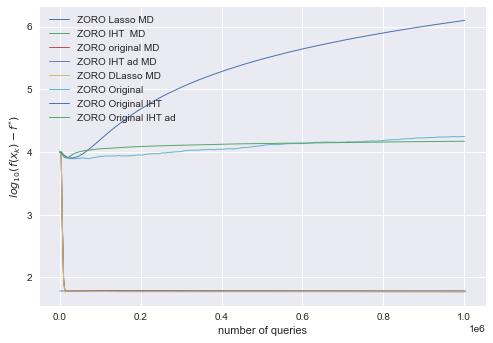

In [19]:
fig, ax = plt.subplots()
ax.plot(np.array(performance_log_ZORO_Lasso_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_Lasso_MD)[:,1])), linewidth=1, label = "ZORO Lasso MD")
#ax.plot(np.array(performance_log_ZORO_Co_MD)[:,0],
 #(np.array(performance_log_ZORO_Co_MD)[:,1]), linewidth=1, label = "ZORO_MD")
ax.plot(np.array(performance_log_ZORO_IHT_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_IHT_MD)[:,1])), linewidth=1, label = "ZORO IHT  MD")
ax.plot(np.array(performance_log_ZORO_Co_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_Co_MD)[:,1])), linewidth=1, label = "ZORO original MD")
ax.plot(np.array(performance_log_ZORO_IHT_ad_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_IHT_ad_MD)[:,1])), linewidth=1, label = "ZORO IHT ad MD")
ax.plot(np.array(performance_log_ZORO_DLasso_MD)[:,0],
 (np.log10(np.array(performance_log_ZORO_DLasso_MD)[:,1])), linewidth=1, label = "ZORO DLasso MD")
ax.plot(np.array(performance_log_ZORO_Co)[:,0],
 (np.log10(np.array(performance_log_ZORO_Co)[:,1])), linewidth=1, label = "ZORO Original")
ax.plot(np.array(performance_log_ZORO_IHT)[:,0],
 (np.log10(np.array(performance_log_ZORO_IHT)[:,1])), linewidth=1, label = "ZORO Original IHT ")
ax.plot(np.array(performance_log_ZORO_IHT_ad)[:,0],
 (np.log10(np.array(performance_log_ZORO_IHT_ad)[:,1])), linewidth=1, label = "ZORO Original IHT ad ")

plt.xlabel('number of queries')
plt.ylabel('$log_{10}(f(x_{k})-f^{*})$')
leg = ax.legend()
plt.show()

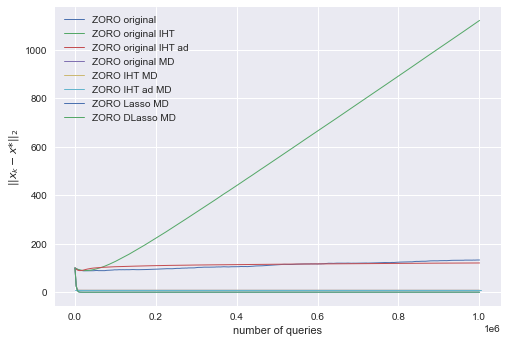

In [20]:
fig, ax = plt.subplots()
ax.plot(np.array(cost_Co)[:,0],
 (np.array(cost_Co)[:,1]), linewidth=1, label = "ZORO original")

ax.plot(np.array(cost_IHT)[:,0],
 (np.array(cost_IHT)[:,1]), linewidth=1, label = "ZORO original IHT")
ax.plot(np.array(cost_IHT_ad)[:,0],
 (np.array(cost_IHT_ad)[:,1]), linewidth=1, label = "ZORO original IHT ad ")
ax.plot(np.array(cost_Co_MD)[:,0],
 (np.array(cost_Co_MD)[:,1]), linewidth=1, label = "ZORO original MD")
ax.plot(np.array(cost_IHT_MD)[:,0],
 (np.array(cost_IHT_MD)[:,1]), linewidth=1, label = "ZORO IHT MD")
ax.plot(np.array(cost__IHT_ad_MD)[:,0],
 (np.array(cost__IHT_ad_MD)[:,1]), linewidth=1, label = "ZORO IHT ad MD")
ax.plot(np.array(cost_Lasso_MD)[:,0],
 (np.array(cost_Lasso_MD)[:,1]), linewidth=1, label = "ZORO Lasso MD")
ax.plot(np.array(cost_DLasso_MD)[:,0],
 (np.array(cost_DLasso_MD)[:,1]), linewidth=1, label = "ZORO DLasso MD")

plt.xlabel('number of queries')
plt.ylabel('$ || x_{k}-x{*}||_{2} $')
leg = ax.legend()
plt.show()